In [1]:
#Importaciones
from loadsets import load_sets
from utiles import graficar_sets


#Cargamos los sets
sets = load_sets()

[it_train, it_validation, it_test, it_mtest] = sets

#Graficamos los sets
#graficar_sets(sets)


Train:
Found 1726 images belonging to 10 classes.
Validation:
Found 200 images belonging to 10 classes.
Test:
Found 136 images belonging to 10 classes.
Meta-test:
Found 10 images belonging to 10 classes.


In [2]:
from modelo_sign03 import create_model_sign03
#from tensorflow.keras.utils import plot_model

models = list()

models.append(
    create_model_sign03(
        #Capas adicionales
        DenseDims = [128, 256],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2]
    )
)

models.append(
    create_model_sign03(
        #Capas adicionales
        DenseDims = [128, 256],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2]
    )
)

models.append(
    create_model_sign03(
        #Capas adicionales
        DenseDims = [128, 512],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2]
    )
)

models.append(
    create_model_sign03(
        #Capas adicionales
        DenseDims = [128, 512],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2]
    )
)

models.append(
    create_model_sign03(
        #Capas adicionales
        DenseDims = [160, 460],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2]
    )
)

models.append(
    create_model_sign03(
        #Capas adicionales
        DenseDims = [160, 460],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2]
    )
)


#model.summary()

#plot_model(model, to_file='s01v01.png', show_shapes=True, show_layer_names=True)



 --------- VARIANTE  1 ---------


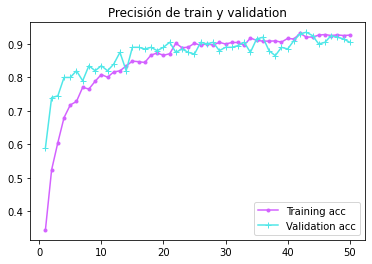

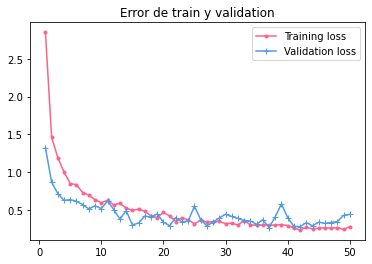


--TEST--
Test accuracy: 91.9%
Test acc:  0.9191176295280457
Test loss:  0.45277664065361023

--METATEST--
Meta-Test accuracy: 60.0%
Meta-Test acc: 0.6000000238418579
Meta-Test loss: 7.895212650299072


 --------- VARIANTE  2 ---------


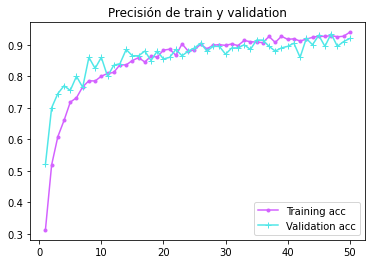

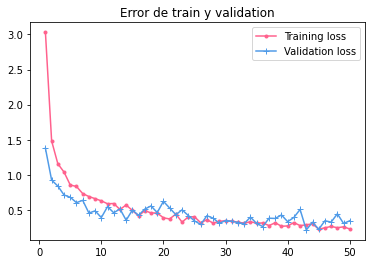


--TEST--
Test accuracy: 91.2%
Test acc:  0.9117646813392639
Test loss:  0.43327122926712036

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 5.167387962341309


 --------- VARIANTE  3 ---------


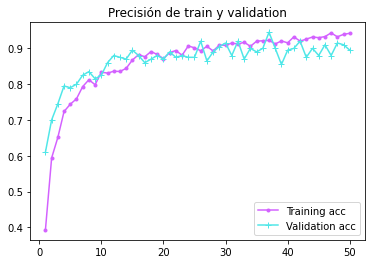

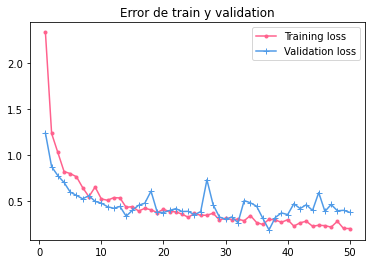


--TEST--
Test accuracy: 92.6%
Test acc:  0.9264705777168274
Test loss:  0.2998155653476715

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 6.90655517578125


 --------- VARIANTE  4 ---------


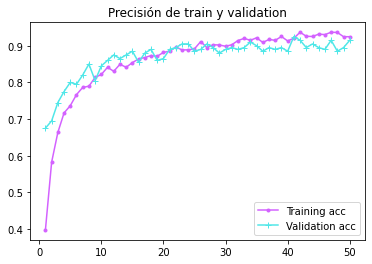

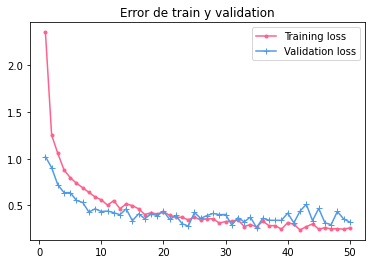


--TEST--
Test accuracy: 91.2%
Test acc:  0.9117646813392639
Test loss:  0.47549954056739807

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 3.428002119064331


 --------- VARIANTE  5 ---------


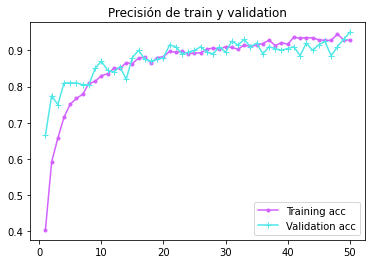

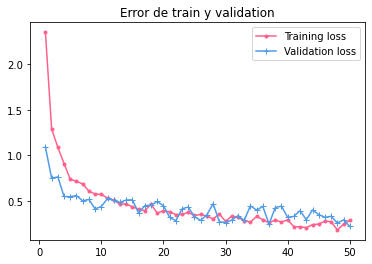


--TEST--
Test accuracy: 94.1%
Test acc:  0.9411764740943909
Test loss:  0.4209933876991272

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 4.670788764953613


 --------- VARIANTE  6 ---------


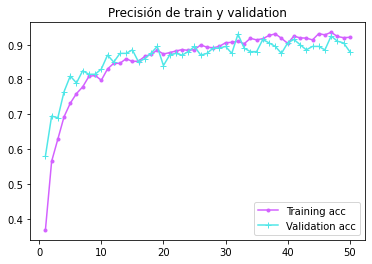

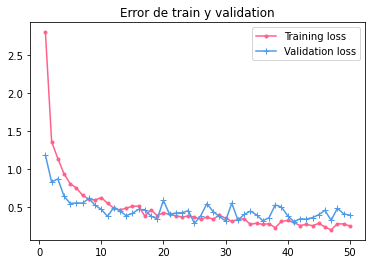


--TEST--
Test accuracy: 94.9%
Test acc:  0.9485294222831726
Test loss:  0.30546054244041443

--METATEST--
Meta-Test accuracy: 60.0%
Meta-Test acc: 0.6000000238418579
Meta-Test loss: 3.350996494293213


In [3]:
from tensorflow.keras.optimizers import Adam
from utiles import draw_history

########################################### COMP & FIT ###########################################

histories = list()

#Compilación y Entrenamiento
learning_rate = 0.0001
batch_size = 128
epochs = 50

index = 0
for model in models:

    index += 1
    print("\n\n --------- VARIANTE ", index, "---------")

    model.compile(
        loss='categorical_crossentropy',
        optimizer= Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    history = model.fit(
        it_train,
        epochs=epochs, 
        batch_size=batch_size,
        shuffle=True, 
        validation_data=it_validation, 
        verbose=0 
    )    

    loss_test, acc_test = model.evaluate(
                it_test,
                verbose=0
        ) 

    loss_mtest, acc_mtest = model.evaluate(
                it_mtest,
                verbose=0
                ) 
        
    
    draw_history(history)

    print("\n--TEST--")  
    print("Test accuracy: %.1f%%" % (100.0 * acc_test))  
    print("Test acc: ", acc_test)  
    print("Test loss: ", loss_test)  
    print("\n--METATEST--")  
    print("Meta-Test accuracy: %.1f%%" % (100.0 * acc_mtest))  
    print("Meta-Test acc:", acc_mtest)  
    print("Meta-Test loss:", loss_mtest)  
